In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("Sample - Superstore.csv", encoding = 'latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [11]:
df['State'].value_counts().count()

49

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# **Sales and Profit across Regions**

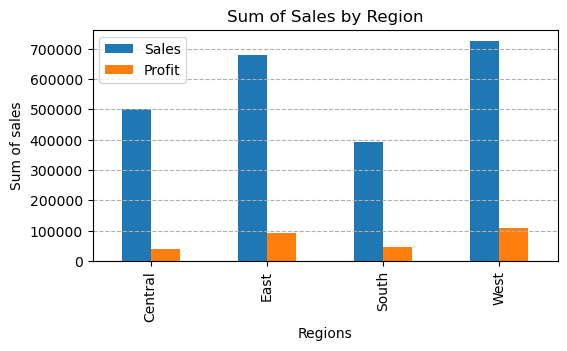

In [14]:
sales_by_region = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
sales_by_region.plot(kind='bar', x= 'Region', figsize=(6,3))
plt.xlabel('Regions')
plt.ylabel('Sum of sales')
plt.title('Sum of Sales by Region')
plt.grid(linestyle = '--', axis ='y')
plt.show()

In [15]:
sales_by_region['Profit %'] = (sales_by_region['Profit'] / sales_by_region['Sales']) * 100

print(sales_by_region[['Region', 'Sales', 'Profit', 'Profit %']])

    Region        Sales       Profit   Profit %
0  Central  501239.8908   39706.3625   7.921629
1     East  678781.2400   91522.7800  13.483399
2    South  391721.9050   46749.4303  11.934342
3     West  725457.8245  108418.4489  14.944831


The West, East, and South regions are doing well with both sales and profit margins. But in the Central region, even though sales are decent, the profit percentage is quite low, not in line with the performance. There's a need to work on improving profit margins in Central and push sales growth in the South, where the margins are good but sales are lower.

# **Sum of Sales by Category**

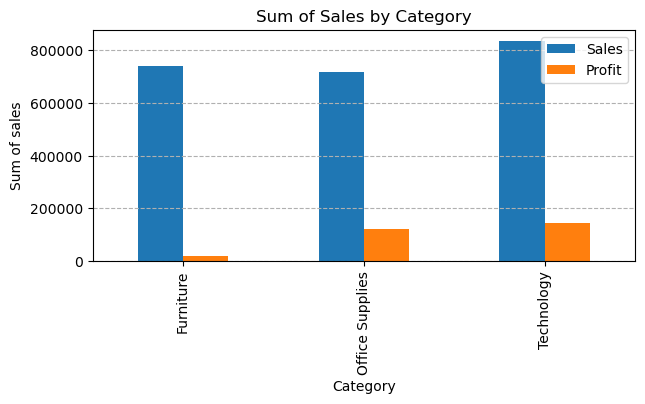

In [18]:
sales_by_category = df.groupby('Category')[['Sales','Profit']].sum().reset_index()
sales_by_category.plot(kind='bar',x='Category',figsize=(7,3))
plt.xlabel('Category')
plt.ylabel('Sum of sales')
plt.title('Sum of Sales by Category')
plt.grid(linestyle = '--', axis ='y')
plt.show()

In [19]:
sales_by_category['Profit %'] = (sales_by_category['Profit'] / sales_by_category['Sales']) * 100

print(sales_by_category[['Category', 'Sales', 'Profit', 'Profit %']])

          Category        Sales       Profit   Profit %
0        Furniture  741999.7953   18451.2728   2.486695
1  Office Supplies  719047.0320  122490.8008  17.035158
2       Technology  836154.0330  145454.9481  17.395712


Technology and Office Supplies are the top-performing categories with strong sales and excellent profit margins, both above 17%. On the other hand, Furniture, despite having decent sales, shows a very low profit margin (~2.5%), which is a clear area of concern. Focus should be on improving profitability in the Furniture segment, either by reducing costs or revisiting pricing strategies.

# **Sales vs Profit by Sub-Categories**

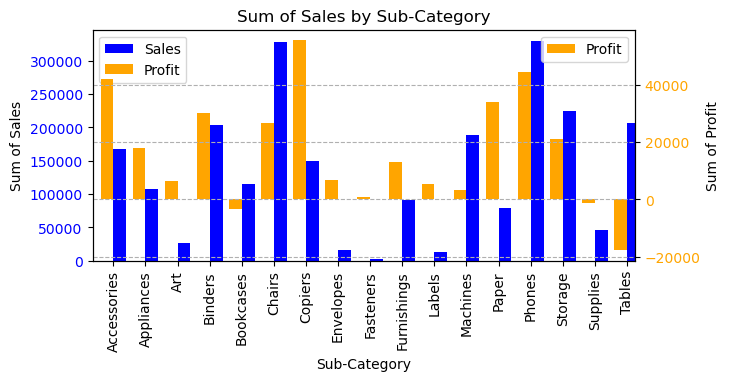

In [22]:
sales_by_Subcategory= df.groupby('Sub-Category')[['Sales','Profit']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(7,3))

sales_by_Subcategory.plot(kind='bar', x='Sub-Category', y='Sales', ax=ax1, position = 0,width=0.4,label = 'Sales', color = 'blue')
ax1.set_ylabel('Sum of Sales')
ax1.tick_params(axis ='y', labelcolor='blue')

ax2= ax1.twinx()
sales_by_Subcategory.plot(kind='bar', x='Sub-Category', y='Profit', ax=ax2, position =1,width=0.4,label = 'Profit', color= 'orange')
ax2.set_ylabel('Sum of Profit')
ax2.tick_params(axis ='y', labelcolor='orange')
# Combine legends
lines1,labels1 = ax1.get_legend_handles_labels()
lines2,labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, loc='upper left')

plt.title('Sum of Sales by Sub-Category')
plt.grid(linestyle = '--', axis ='y')
plt.show()

In [23]:
sales_by_Subcategory['Profit %'] = (sales_by_Subcategory['Profit'] / sales_by_Subcategory['Sales']) * 100

print(sales_by_Subcategory[['Sub-Category', 'Sales', 'Profit', 'Profit %']])

   Sub-Category        Sales      Profit   Profit %
0   Accessories  167380.3180  41936.6357  25.054700
1    Appliances  107532.1610  18138.0054  16.867517
2           Art   27118.7920   6527.7870  24.071083
3       Binders  203412.7330  30221.7633  14.857361
4     Bookcases  114879.9963  -3472.5560  -3.022768
5        Chairs  328449.1030  26590.1663   8.095673
6       Copiers  149528.0300  55617.8249  37.195585
7     Envelopes   16476.4020   6964.1767  42.267582
8     Fasteners    3024.2800    949.5182  31.396504
9   Furnishings   91705.1640  13059.1436  14.240358
10       Labels   12486.3120   5546.2540  44.418672
11     Machines  189238.6310   3384.7569   1.788618
12        Paper   78479.2060  34053.5693  43.391837
13       Phones  330007.0540  44515.7306  13.489327
14      Storage  223843.6080  21278.8264   9.506113
15     Supplies   46673.5380  -1189.0995  -2.547695
16       Tables  206965.5320 -17725.4811  -8.564460


Several sub-categories like Labels, Paper, Envelopes, Copiers, and Fasteners are showing exceptionally high profit margins, making them strong contributors despite lower sales in some cases.
Phones, Chairs, and Storage have solid sales with decent profits, indicating reliable performance.

However, Tables, Bookcases, and Supplies are dragging overall profitability with negative profit margins, especially Tables with a steep loss despite high sales.
Efforts should be made to reduce losses in these low-performing categories and consider promoting high-margin but low-sales items like Labels and Paper to maximize profitabilty.

# **States with Highest Sales across the Country**

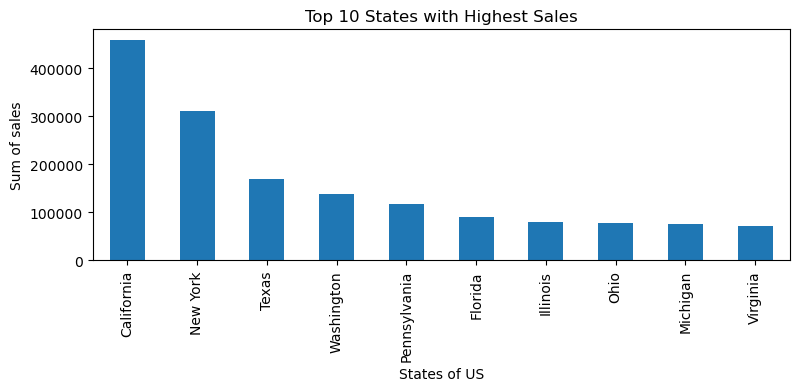

In [26]:
sales_by_city = df.groupby('State')['Sales'].sum().sort_values(ascending= False).head(10)
sales_by_city.plot(kind='bar',figsize=(9,3))
plt.xlabel('States of US')
plt.ylabel('Sum of sales')
plt.title('Top 10 States with Highest Sales')
plt.show()

# **Most Profitable Products**

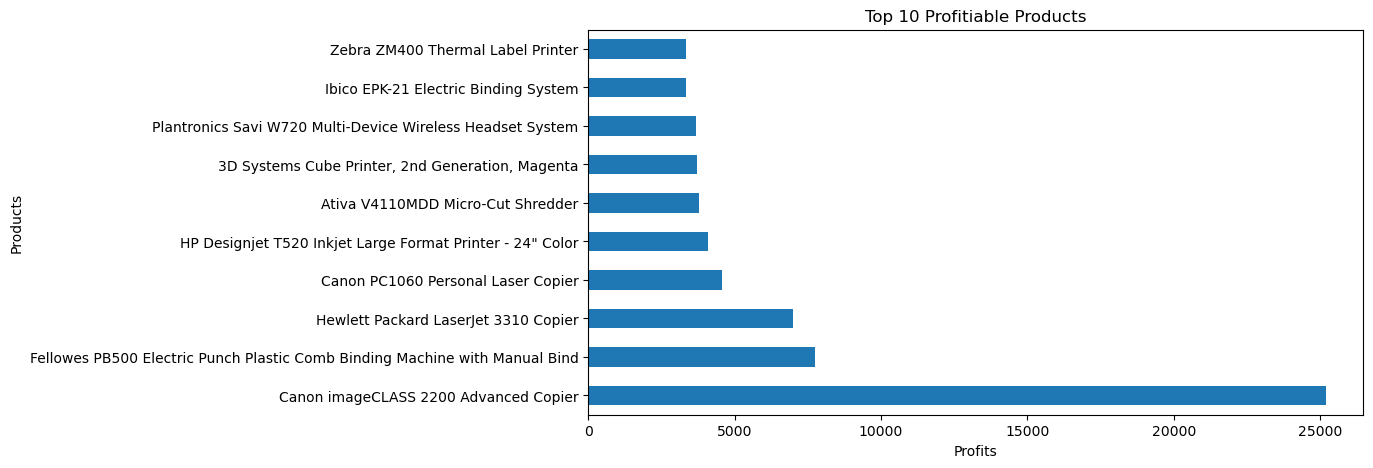

In [66]:
Profit_Products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
Profit_Products.plot(kind = 'barh', figsize=(10,5))
plt.xlabel('Profits')
plt.ylabel('Products')
plt.title('Top 10 Profitiable Products')
plt.show()

# **Loss-Making Products**

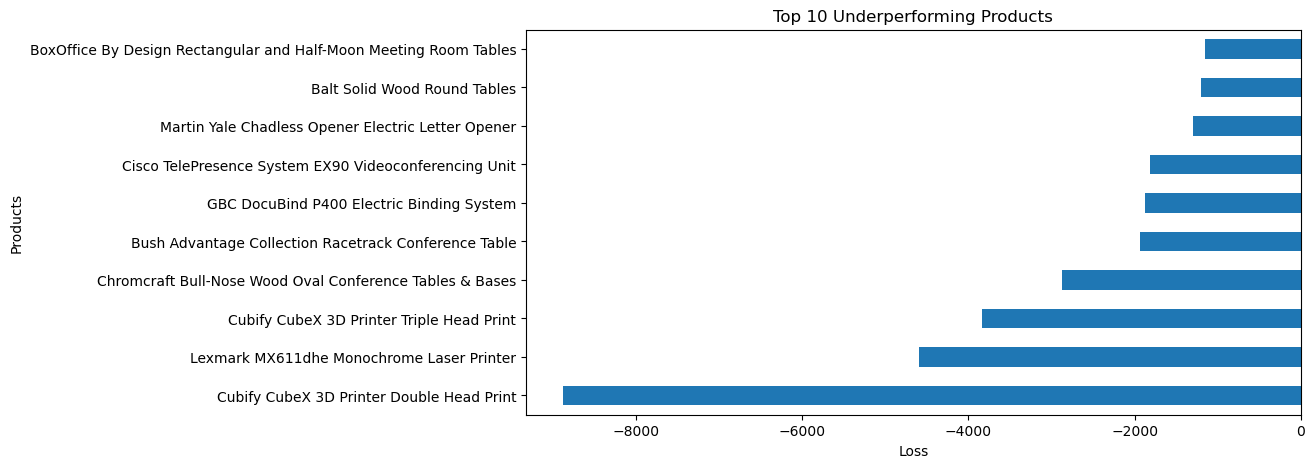

In [68]:
Loss_Products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=True).head(10)
Loss_Products.plot(kind = 'barh', figsize=(10,5))
plt.xlabel('Loss')
plt.ylabel('Products')
plt.title('Top 10 Underperforming Products')
plt.show()

# **Effect of Discount on Profit Across Product Categories**

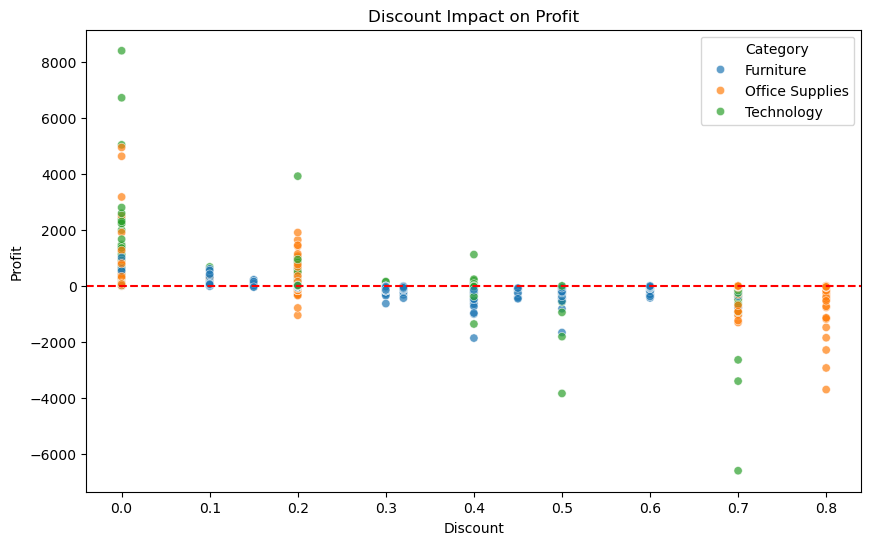

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Discount Impact on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--')
plt.show()

As discounts increase, profits tend to drop — especially after the 20% mark, where losses become more common across all categories. Products sold without any discount or with minimal discounts are generally more profitable, especially in the Technology and Office Supplies categories.

Furniture and Office Supplies show a steady dip in profits with higher discounts, while Technology has a few high-profit spikes but also suffers heavy losses at larger discounts.

**Discounts should be used wisely — keeping them low (under 20%) helps protect profit margins. A smarter pricing strategy and focusing on value over discounting could really help improve overall profitability.**

# **Monthly Sales Performance Overview**

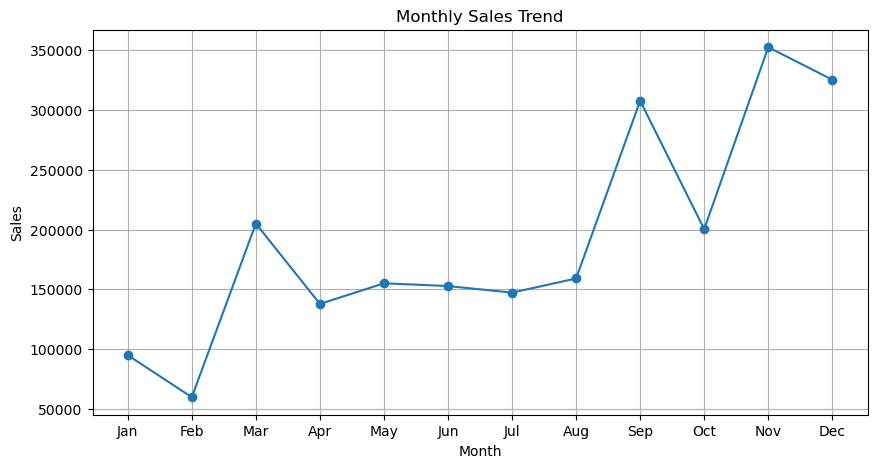

In [35]:
df['Month'] = df['Order Date'].dt.month
df['MonthName'] = df['Order Date'].dt.strftime('%b')
monthly_sales = df.groupby(['Month','MonthName'])['Sales'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Month')
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['MonthName'],monthly_sales['Sales'], marker = 'o',linestyle= '-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Sales peak in November and December, indicating a strong year-end boost — possibly due to holiday or festive season shopping.